<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week12_HW1_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드 ch5. 4 pg. 303~310)

### 보스턴 주택 가격 예측
### 1. LinearRegression 클래스 - Ordinary Least Squares
- **LinearRegression** 클래스는 **예측값과 실제값의 RSS**(Residual Sum of Squares)**를 최소화하여 OLS**(Ordinary Least Squares) **추정 방식으로 구현**한 클래스이다.
- LinearRegression 클래스는 `fit()` 메서드로 X, y 배열을 입력 받으면 회귀 계수인 W를 **`coef_`** 속성에 저장한다.

> 입력 파라미터
 - **fit_intercept**: intercept(절편) 값을 계산할 것인지 아닌지를 지정하는 불린 값으로, 디폴트는 True이다. False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
 - **normalize**: 입력 데이터 세트를 정규화할 것인지 지정하는 불린 값으로 디폴트는 False이다. True로 지정하면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.

> 속성
 - **coef_**: `fit()` 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성이다. Shape는 (Target 값 개수, 피처 개수)이다.
 - **intercept_**: intercept 값이다.

`class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`

### 보스턴 주택 가격 예측
### 2. 회귀 평가 지표
- 회귀의 평가를 위한 지표는 **실제값과 회귀 예측값의 차이 값**을 기반으로 한 지표가 중심이다.
- 실제값과 예측값의 차이를 그냥 더하면 오류가 상쇄되므로, 오류의 절대값의 평균이나 제곱 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

> - **MAE**: Mean Absolute Error
 - 실제값과 예측값의 차이를 **절대값**으로 변환하여 평균한 것이다. 
 - $MAE=\frac{1}{n}{\sum_{i=1}^N|Y_i-\widehat{Y_i}|}$
 - 사이킷런 평가 지표 API: **`metrics.mean_absolute_error`**
 - Scoring 함수 적용 값: `neg_mean_absolute_error`
- **MSE**: Mean Squared Error
 - 실제값과 예측값의 차이를 **제곱**하여 평균한 것이다. 
 - $MSE=\frac{1}{n}{\sum_{i=1}^N(Y_i-\widehat{Y_i})^2}$
 - 사이킷런 평가 지표 API **`metrics.mean_squared_error`**
 - Scoring 함수 적용 값: `neg_mean_squared_error`
- **RMSE**: Root Mean Squared Error
 - MSE 값이 오류의 제곱을 구하여 실제 오류 평균보다 더 커지는 특성을 감안하여 MSE에 루트를 씌운 값이다. 
 - $RMSE=\sqrt{\frac{1}{n}{\sum_{i=1}^N(Y_i-\widehat{Y_i})^2}}$
 - 사이킷런 평가 지표 API를 제공하지 않는다.
- **$R^2$**
 - 실제값의 분산 대비 예측값의 분산 비율을 나타내며, 1에 가까울수록 예측 정확도가 높다. 
 - $R^2 = \frac{예측값 Variance}{실제값 Variance}$
 - 사이킷런 평가 지표 API **`metrics.r2_score`**
 - Scoring 함수 적용 값: `r2`

- cross_val_score, GridSearchCV와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 유의해야 할 점은 파라미터에 **neg_**라는 접두어가 붙는다는 것이다. 이는 음수 값을 가진다는 의미로, 음수 값을 반환한다.
- 사이킷런의 Scoring 함수는 score 값이 클수록 좋은 평가 결과로 자동 평가한다. 그러나 실제값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이므로 보정이 필요하다.
- 따라서 -1을 원래의 평가 지표 값에 곱하여 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 하므로, 실제값과 예측값의 오류 차이가 가장 적은 회귀 평가 지표를 가장 좋은 평가 결과로 인식한다,

### 보스턴 주택 가격 예측
### 3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- 사이킷런은 `load_boston()`을 통해 보스턴 주택 가격 데이터 세트를 제공한다. 해당 데이터 세트를 로드하고 DataFrame으로 변경한다.
- 데이터 세트의 피처의 Null 값은 없으며, 모두 float 형이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy import stats

# boston 데이터 세트 로드
from sklearn.datasets import load_boston
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격이며 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target

In [ ]:
print("Boston 데이터 세트 크기:", bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 보스턴 주택 가격 예측
### 3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화한다.
- 'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'의 총 8개 칼럼에 대해, 각 칼럼의 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다.
- seaborn의 **`regplot()`** API는 X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그린다.
- **`matplotlib.subplots()`**를 이용하여 각 ax마다 칼럼과 PRICE의 관계를 표현한다. 
- matplotlib의 `subplots()`는 여러 개의 그래프를 한번에 표현하기 위해 자주 사용되는 것으로 **nrows**는 행 방향으로 위치할 그래프의 개수를, **ncols**는 열 방향으로 위치할 그래프의 개수를 나타낸다. 출력값으로 nrowsXncols 값만큼의 ax를 가진다.
- 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. RM은 PRICE와 양 방향의 선형성을, LSTAT은 PRICE와 음 방향의 선형성이 가장 크다.

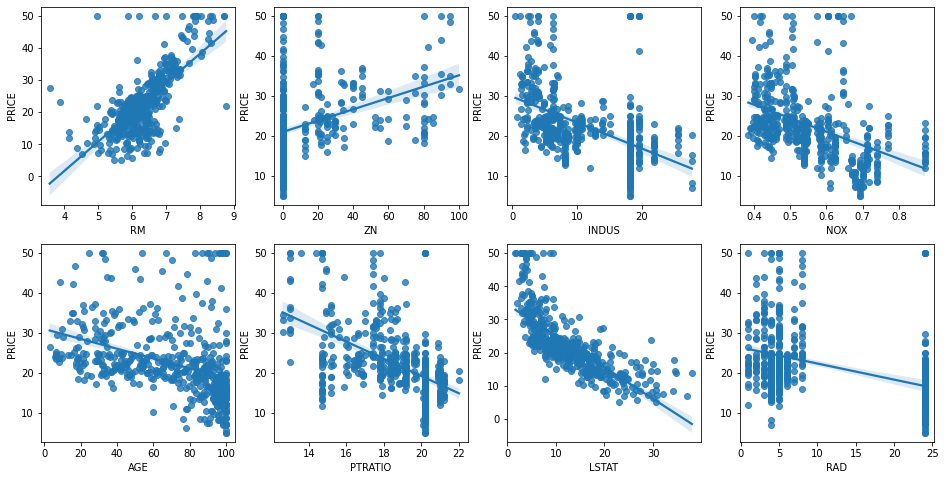

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 2X4개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=4)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4) # i를 4로 나눈 몫
    col = i%4 # i를 4로 나눈 나머지
    # seaborn의 regplot을 이용하여 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

### 보스턴 주택 가격 예측
### 3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- **`LinearRegression`** 클래스를 이용하여 보스턴 주택 가격의 회귀 모델을 만들고, `train_test_split()`을 이용하여 학습 데이터 세트와 테스트 데이터 세트를 분리해 학습과 예측을 수행한다.
- metrics 모듈의 **`mean_squared_error()`**와 **`r2_score()`** API를 이용하여 MSE와 R2 Score를 측정한다.

In [ ]:
from sklearn.model_selection import train_test_split
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


### 보스턴 주택 가격 예측
### 3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- LinearRegression으로 생성한 주택 가격 모델의 intercept(절편)과 coefficeints(회귀 계수)값을 살펴볼 수 있다.
- 절편은 LinearRegression 객체의 **`intercept_`** 속성에, 회귀 계수는 **`coef_`** 속성에 값이 저장되어 있다.
- coef_ 속성은 회귀 계수 값만 가지고 있으므로, 이를 피처별 회귀 계수 값으로 다시 매핑하고 높은 순으로 출력한다. 이를 위해서 Pandas Series의 `sort_values()` 함수를 이용한다.
- RM 피처의 회귀 계수가 양의 값으로 회귀 계수가 가장 크고, NOX 피처의 회귀 계수가 음의 값으로 매우 작아보인다.
- 최적화를 수행하면서 피처들의 회귀 계수의 변화를 같이 관찰한다.

In [ ]:
print("절편 값:", lr.intercept_)
print("회귀 계수값:", np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수 값을 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# 피처별 회귀 계수 값이 높은 순으로 정렬하기 위해 sort_values를 이용
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 보스턴 주택 가격 예측
### 3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- 5개의 폴드 세트에서 사이킷런의 **`cross_val_score()`**를 이용해 교차 검증으로 MSE와 RMSE를 측정한다. RMSE를 제공하지 않으므로 MSE 수치를 변환한다.
- 사이킷런의 metric 평가 기준에 부합시키기 위해 scoring에 **`neg_mean_squared_error`**를 지정하여 수치 값으로 음수를 반환한다. 반환된 값에 다시 -1을 곱하여 원래 구하고자 한 모델의 MSE 값을 구한다.


In [ ]:
from sklearn.model_selection import cross_val_score

# cross_val_score()로 5개 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
mse_scores = -1 * neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 2))
print("5 folds의 개별 MSE scores:", np.round(mse_scores, 2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 MSE scores: [12.46 26.05 33.07 80.76 33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829
